# Notebook to analyze Daedalus reports

This script plots histograms based on the data produced by a Daedalus report.


Summary Metrics:


,totalSlicesFound,totalSlicesMerged,totalSlicesDiscarded,sizeOfLargestSliceBeforeMerging,sizeOfLargestSliceAfterMerging
0,11,4,3,6,4


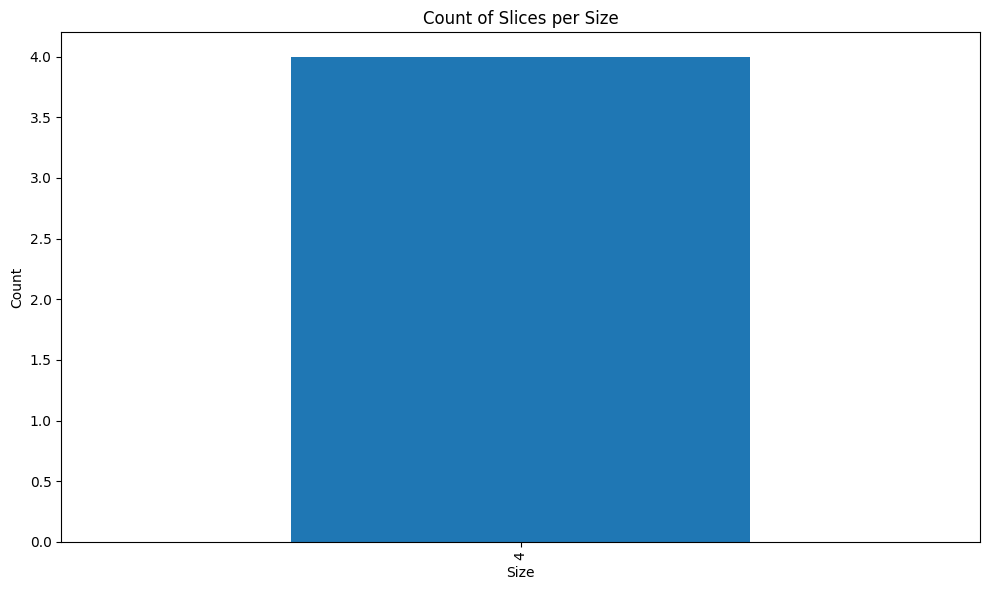

In [17]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

# A Daedalus report has the following syntax:
data = """
totalSlicesFound = 11
totalSlicesMerged = 4
totalSlicesDiscarded = 3
sizeOfLargestSliceBeforeMerging = 6
sizeOfLargestSliceAfterMerging = 4
mergedSlicesMetadata:
	_wyvern_slice_main__609848474:
		size = 4
	_wyvern_slice_main__258803180:
		size = 4
	_wyvern_slice_main__720642833:
		size = 4
	_wyvern_slice_main__1393073:
		size = 4
"""

# Parse the data
lines = data.strip().split('\n')
parsed_data = {}
merged_slices = {}

current_dict = parsed_data
current_slice = None

for line in lines:
    if line.startswith('mergedSlicesMetadata:'):
        current_dict = merged_slices
    elif line.startswith('\t'):
        if '=' in line:
            key, value = line.split('=')
            key = key.strip()
            value = int(value.strip())
            current_dict[current_slice][key] = value
        else:
            current_slice = line.strip(':').strip()
            current_dict[current_slice] = {}
    elif '=' in line:
        key, value = line.split('=')
        parsed_data[key.strip()] = int(value.strip())


# Create dataframes
summary_df = pd.DataFrame([parsed_data])
merged_slices_df = pd.DataFrame.from_dict(merged_slices, orient='index')

# Print summary metrics
print("Summary Metrics:")
display(summary_df)

# Calculate size counts
size_counts = merged_slices_df['size'].value_counts()

# Plot histogram for merged slices sizes
fig, ax = plt.subplots(figsize=(10, 6))

size_counts.plot(kind='bar', ax=ax, legend=False)
ax.set_title('Count of Slices per Size')
ax.set_xlabel('Size')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()
